In [1]:
import os
import shutil
import random
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
train_path = 'C:/Users/sudar/Downloads/Pneumonia/Train'
test_path = 'C:/Users/sudar/Downloads/Pneumonia/Test'

In [4]:
# List the subdirectories (categories/classes) in the train dataset directory
categories = [category for category in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, category))]

# Get the number of categories
num_categories = len(categories)

print(f"The train dataset contains {num_categories} categories.")

The train dataset contains 4 categories.


In [5]:
# List the subdirectories (categories/classes) in the train dataset directory
categories2 = [category for category in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, category))]

# Get the number of categories
num_categories = len(categories2)

print(f"The test dataset contains {num_categories} categories.")

The test dataset contains 4 categories.


In [6]:
# Initialize a dictionary to store category names and their respective image counts
category_counts = {}

# List the subdirectories (categories/classes) in the train dataset directory
categories = [category for category in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, category))]

# Iterate through each category and count the number of images
for category in categories:
    category_dir = os.path.join(train_path, category)
    image_files = [filename for filename in os.listdir(category_dir) if filename.endswith(('.jpg', '.png', '.jpeg', '.gif'))]
    category_counts[category] = len(image_files)

# Print the category names and their respective image counts
for category, count in category_counts.items():
    print(f"Category: {category}, Number of Images: {count}")

Category: COVID-19, Number of Images: 1152
Category: Normal, Number of Images: 2943
Category: Pneumonia-Bacterial, Number of Images: 2700
Category: Pneumonia-Viral, Number of Images: 1490


In [7]:
# Initialize a dictionary to store category names and their respective image counts
category_counts = {}

# List the subdirectories (categories/classes) in the validation dataset directory
categories = [category for category in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, category))]

# Iterate through each category and count the number of images
for category in categories:
    category_dir = os.path.join(test_path, category)
    image_files = [filename for filename in os.listdir(category_dir) if filename.endswith(('.jpg', '.png', '.jpeg', '.gif'))]
    category_counts[category] = len(image_files)

# Print the category names and their respective image counts
for category, count in category_counts.items():
    print(f"Category: {category}, Number of Images: {count}")

Category: COVID-19, Number of Images: 129
Category: Normal, Number of Images: 327
Category: Pneumonia-Bacterial, Number of Images: 301
Category: Pneumonia-Viral, Number of Images: 166


In [8]:
def count_images_in_directory(directory):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif']  # Add more extensions if needed
    image_count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    return image_count

# Count the number of images in the training and testing directories
train_image_count = count_images_in_directory(train_path)
test_image_count = count_images_in_directory(test_path)

print(f"Total number of images in training folder: {train_image_count}")
print(f"Total number of images in testing folder: {test_image_count}")

Total number of images in training folder: 8285
Total number of images in testing folder: 923


In [ ]:
import os
import random
import shutil

# Set your train_path and final_validation_path
train_path = 'C:/Users/sudar/Downloads/Pneumonia/Train'
valid_path = 'C:/Users/sudar/Downloads/Pneumonia/Valid'

# Create the final_validation directory if it doesn't exist
os.makedirs(valid_path, exist_ok=True)

# List all subdirectories (classes) in the train_path
class_directories = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]

# Move and remove a total of 150 random images from all classes to final_validation
num_images_to_move = 150

for class_dir in class_directories:
    class_path = os.path.join(train_path, class_dir)
    all_images = os.listdir(class_path)

    # Randomly select images from the class
    images_to_move = random.sample(all_images, num_images_to_move)

    for image in images_to_move:
        src_path = os.path.join(class_path, image)
        dest_path = os.path.join(valid_path, class_dir, image)

        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.move(src_path, dest_path)  # Move the images

print(f"Moved {num_images_to_move} images in total to Valid")

# Now, remove the moved images from the training set
for class_dir in class_directories:
    class_path = os.path.join(train_path, class_dir)
    images_to_remove = os.listdir(os.path.join(valid_path, class_dir))

    for image in images_to_remove:
        image_path = os.path.join(class_path, image)
        os.remove(image_path)

print("Removed the moved images from the training set.")

In [10]:
def count_images_in_directory(directory):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif']  # Add more extensions if needed
    image_count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    return image_count

# Count the number of images in the training and testing directories
train_image_count = count_images_in_directory(train_path)
test_image_count = count_images_in_directory(test_path)
valid_image_count = count_images_in_directory(valid_path)

print(f"Total number of images in training folder: {train_image_count}")
print(f"Total number of images in testing folder: {test_image_count}")
print(f"Total number of images in testing folder: {valid_image_count}")

Total number of images in training folder: 7685
Total number of images in testing folder: 923
Total number of images in testing folder: 600


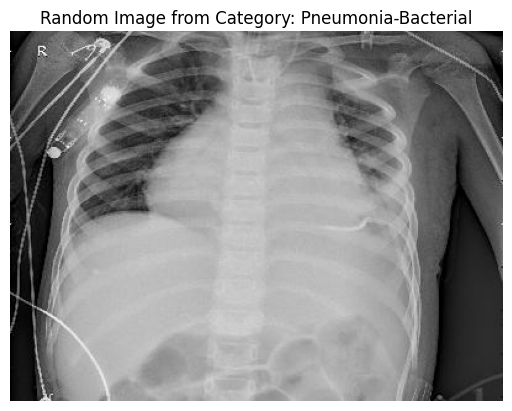

Category Folder: Pneumonia-Bacterial


In [11]:
import random
from PIL import Image
import matplotlib.pyplot as plt

# List the subdirectories (categories/classes) in the train dataset directory
categories = [category for category in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, category))]

# Randomly select a category
random_category = random.choice(categories)

# Get a list of image files in the selected category
category_dir = os.path.join(train_path, random_category)
image_files = [os.path.join(category_dir, filename) for filename in os.listdir(category_dir)]

# Randomly select an image file from the category
random_image_path = random.choice(image_files)

# Load and display the random image
random_image = Image.open(random_image_path)
plt.imshow(random_image)
plt.title(f"Random Image from Category: {random_category}")
plt.axis('off')
plt.show()

# Print the name of the labeled category folder
print(f"Category Folder: {random_category}")

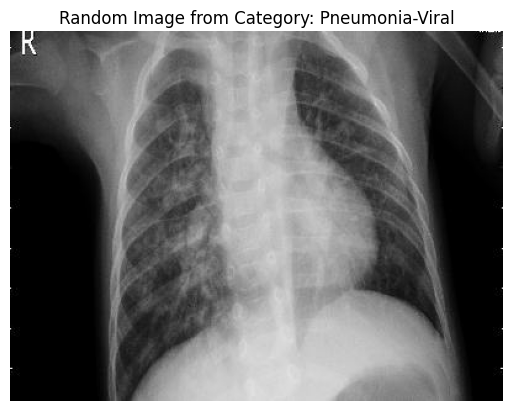

Category Folder: Pneumonia-Viral


In [12]:
import random
from PIL import Image
import matplotlib.pyplot as plt

# List the subdirectories (categories/classes) in the train dataset directory
categories = [category for category in os.listdir(valid_path) if os.path.isdir(os.path.join(valid_path, category))]

# Randomly select a category
random_category = random.choice(categories)

# Get a list of image files in the selected category
category_dir = os.path.join(valid_path, random_category)
image_files = [os.path.join(category_dir, filename) for filename in os.listdir(category_dir)]

# Randomly select an image file from the category
random_image_path = random.choice(image_files)

# Load and display the random image
random_image = Image.open(random_image_path)
plt.imshow(random_image)
plt.title(f"Random Image from Category: {random_category}")
plt.axis('off')
plt.show()

# Print the name of the labeled category folder
print(f"Category Folder: {random_category}")

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [35]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [36]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
img_height,img_width=224,224
batch_size=32
train_ds = train_datagen.flow_from_directory(
  train_path,
  seed=42,
  class_mode ='categorical',
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 7685 images belonging to 4 classes.


In [39]:
img_height,img_width=224,224
batch_size=32
test_ds = test_datagen.flow_from_directory(
  test_path,
  seed=42,
  class_mode ='categorical',
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 923 images belonging to 4 classes.


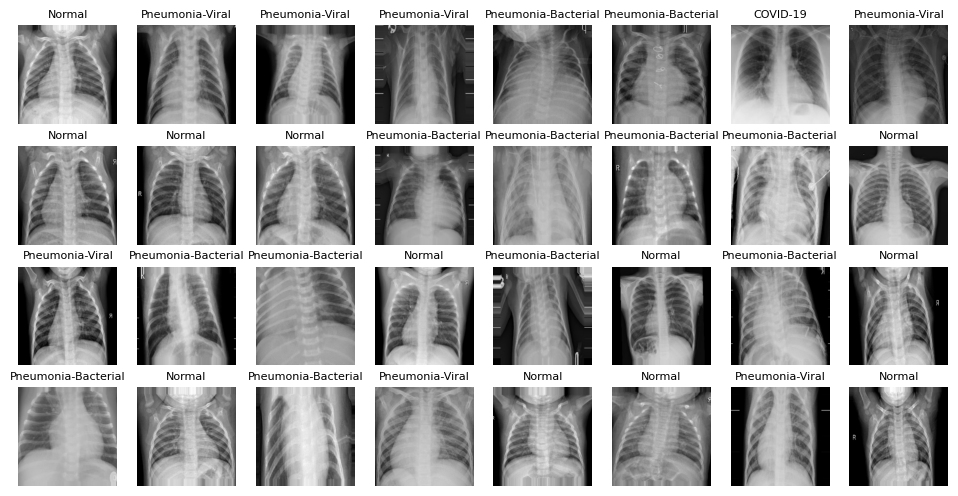

In [40]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the training dataset
batch_images, batch_labels = next(train_ds)

# Define the labels corresponding to the class indices (optional)
class_labels = train_ds.class_indices

# Create a grid of images for visualization
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.ravel()

for i in range(batch_images.shape[0]):
    img = batch_images[i]
    label_index = batch_labels[i].argmax()  # Find the class index for the label
    label = list(class_labels.keys())[list(class_labels.values()).index(label_index)]  # Map index to label
    axes[i].imshow(img)
    axes[i].set_title(label, fontsize=8)  # Set the fontsize for the label
    axes[i].axis('off')

plt.show()

In [19]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [41]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [71]:
model = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4, activation='softmax'))

In [72]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 module_wrapper_8 (ModuleWr  (None, 1280)              0         
 apper)                                                          
                                                                 
 dense_22 (Dense)            (None, 512)               655872    
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dense_24 (Dense)            (None, 128)               65664     
                                                                 
 dense_25 (Dense)            (None, 4)                

In [73]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/15
241/241 [==============================] - 260s 1s/step - loss: 0.5333 - accuracy: 0.7818 - val_loss: 0.5291 - val_accuracy: 0.7920
Epoch 2/15
241/241 [==============================] - 236s 977ms/step - loss: 0.4432 - accuracy: 0.8209 - val_loss: 0.4938 - val_accuracy: 0.8061
Epoch 3/15
241/241 [==============================] - 261s 1s/step - loss: 0.4124 - accuracy: 0.8324 - val_loss: 0.4685 - val_accuracy: 0.8223
Epoch 4/15
241/241 [==============================] - 252s 1s/step - loss: 0.4009 - accuracy: 0.8358 - val_loss: 0.4769 - val_accuracy: 0.8147
Epoch 5/15
241/241 [==============================] - 252s 1s/step - loss: 0.3955 - accuracy: 0.8389 - val_loss: 0.4977 - val_accuracy: 0.7974
Epoch 6/15
241/241 [==============================] - 254s 1s/step - loss: 0.3714 - accuracy: 0.8435 - val_loss: 0.4643 - val_accuracy: 0.8137
Epoch 7/15
241/241 [==============================] - 252s 1s/step - loss: 0.3688 - accuracy: 0.8483 - val_loss: 0.3855 - val_accuracy: 0.8

In [75]:
from keras.models import load_model

In [76]:
model.save('Pneumoniafinal.h6')

INFO:tensorflow:Assets written to: Pneumoniafinal.h6\assets


INFO:tensorflow:Assets written to: Pneumoniafinal.h6\assets


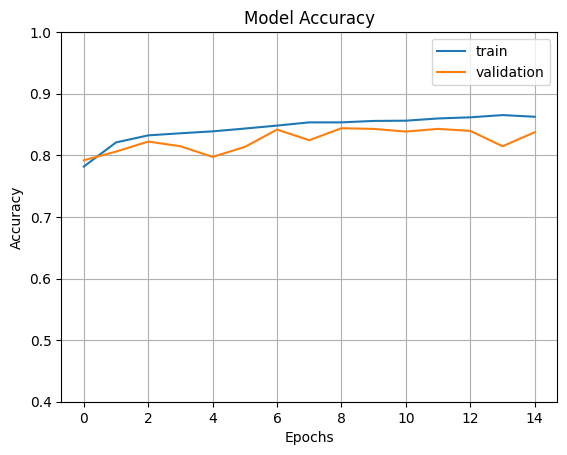

In [77]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

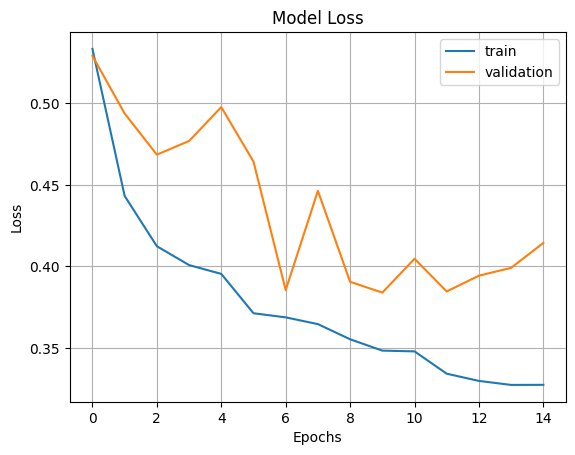

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
valid_datagen = ImageDataGenerator(rescale=1.0/255)
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' if you have multiple classes
    shuffle=False  # Do not shuffle the data
)

Found 600 images belonging to 4 classes.


In [80]:
predictions = model.predict(valid_generator, verbose=1)

# If you want to convert predictions to class labels:
predicted_class_indices = np.argmax(predictions, axis=1)
# You can then map these indices back to class labels using class names or other methods.

# If you want to calculate some metrics (e.g., accuracy) for your validation:
from sklearn.metrics import accuracy_score
true_labels = valid_generator.classes  # Actual labels
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Validation Accuracy:", accuracy)

19/19 [==============================] - 13s 629ms/step
Validation Accuracy: 0.8066666666666666
